## **Simple two-input, one output Project Risk Examination System**

### Source Book: Artificial Intelligence: A Guide to Intelligent Systems (3rd Edition) -  Michael Negnevitsky


 **inputs: project funding, project staffing**
  
  **output: risk**

In [1]:
# install python fuzzy logic toolbox
! pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 8.5MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=1d0afc14432a3d810fa6cc047e30b8bcce662dfdc881d68b5fc5054682876be3
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
# module for fuzzy system design
from skfuzzy import control as ctrl

**Functions**

In [3]:
# list the antecedents and consequents in the system
project_funding = ctrl.Antecedent(universe=np.arange(0,101,10), label='project_funding')
project_staffing = ctrl.Antecedent(universe=np.arange(0,101,10), label='project_staffing')
risk = ctrl.Consequent(universe=np.arange(0,101,10), label='risk', defuzzify_method='centroid')  # centroid deffification method follows Mamdani style


***for inputs***

In [4]:
# custom membership function
project_funding['inadequate'] = fuzz.trapmf(project_funding.universe, [0,0,10,30])
project_funding['marginal'] = fuzz.trimf(project_funding.universe, [20,50,70])
project_funding['adequate'] = fuzz.trapmf(project_funding.universe, [60,80,100,100])


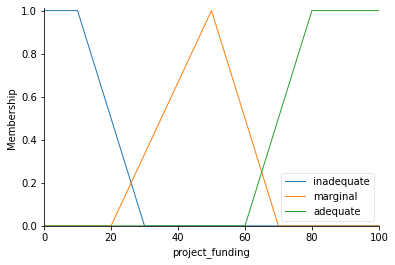

In [5]:
project_funding.view()

In [6]:
project_staffing['small'] = fuzz.trapmf(project_staffing.universe, [0,0,20,70])
project_staffing['large'] = fuzz.trapmf(project_staffing.universe, [30, 80, 100, 100])

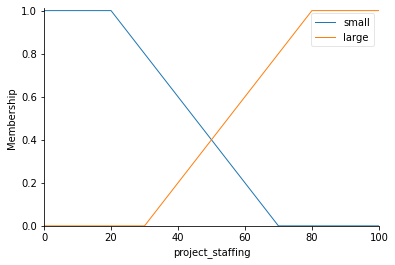

In [7]:
project_staffing.view()

**for outputs**

In [8]:
risk['low'] = fuzz.trapmf(risk.universe, [0,0,20,40])
risk['normal'] = fuzz.trapmf(risk.universe, [30,40,50,60])
risk['high'] = fuzz.trapmf(risk.universe, [50,80,100,100])

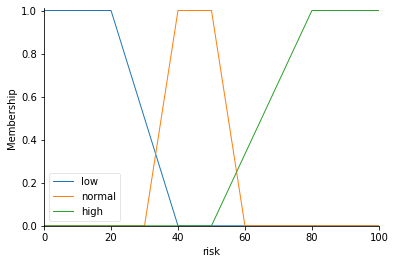

In [9]:
risk.view()

 **Fuzzy Rules**

Consider the following 3 rules:
1.  IF project_funding is adequate OR project_staffing is good THEN risk is low
2.  IF project_funding is marginal AND project_staffing is great THEN risk is normal
3.  IF project_funding is inadequate THEN risk is high

In [10]:
rule1 = ctrl.Rule(project_funding['adequate'] | project_staffing['small'], risk['low'])
rule2 = ctrl.Rule(project_funding['marginal'] & project_staffing['large'], risk['normal'])
rule3 = ctrl.Rule(project_funding['inadequate'] , risk['high'])

**Control System Creation** 

In [11]:
control_system = ctrl.ControlSystem(rules=[rule1, rule2, rule3])


**Control System Simulation**

In [12]:
simulation = ctrl.ControlSystemSimulation(control_system=control_system, clip_to_bounds=True)

 ***Sample Inputs***

In [13]:
#simulation.inputs({'project_funding':70, 'project_staffing': 10}) # low risk
#simulation.inputs({'project_funding':50, 'project_staffing': 70}) # normal risk
simulation.inputs({'project_funding':10, 'project_staffing': 50}) # high risk

**Compute / Simulate**

62.9608636977058


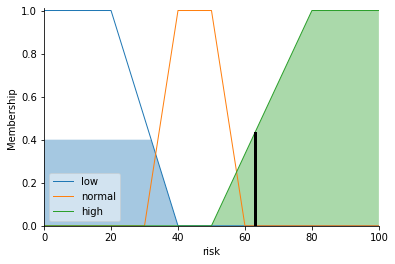

In [15]:
# crunch the numbers
simulation.compute()
print(simulation.output['risk'])
# view the result
risk.view(sim=simulation)